In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt


In [25]:
# ---
# 1. Download and Load Data
# ---
# The Pima dataset is often stored without a header row.
# We'll load it from a reliable URL and provide the column names from your screenshot.
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
data = pd.read_csv(url, header=None, names=col_names)

print("--- Data Head ---")
print(data.head())
print("\n")


--- Data Head ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  




In [26]:
# ---
# 2. Feature Selection (Independent vs. Dependent)
# ---
# 'Outcome' is the dependent (target) variable. All others are independent (features).
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = data[feature_cols]  # Independent variables
y = data.Outcome       # Dependent variable

In [27]:
# ---
# 3. Split Data and Build Decision Tree
# ---
# We'll split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# We will build two trees: one with Gini (the default) and one with Entropy.
# We set max_depth=3 for a cleaner visualization.

# Building the tree using Gini Index
clf_gini = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=1)
clf_gini.fit(X_train, y_train)

# Building the tree using Entropy (for Information Gain)
clf_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=1)
clf_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

--- Displaying Gini Tree ---


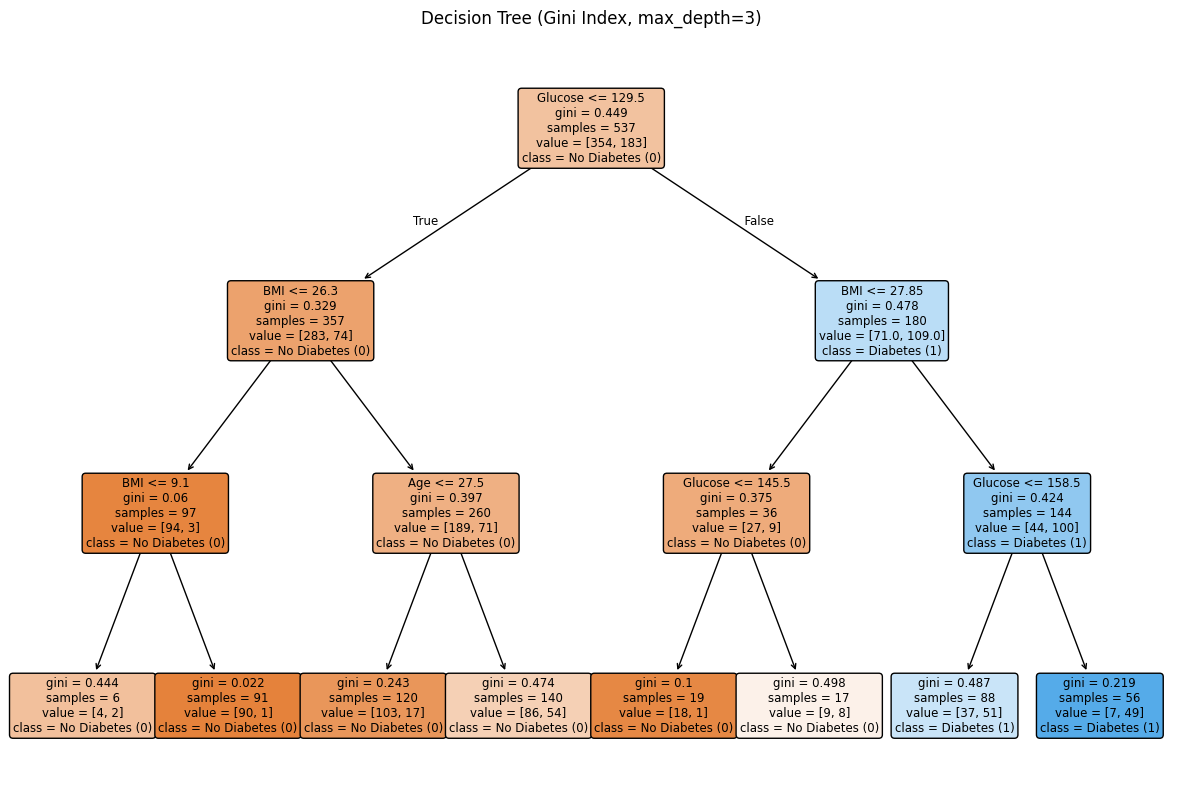

--- Displaying Entropy Tree ---


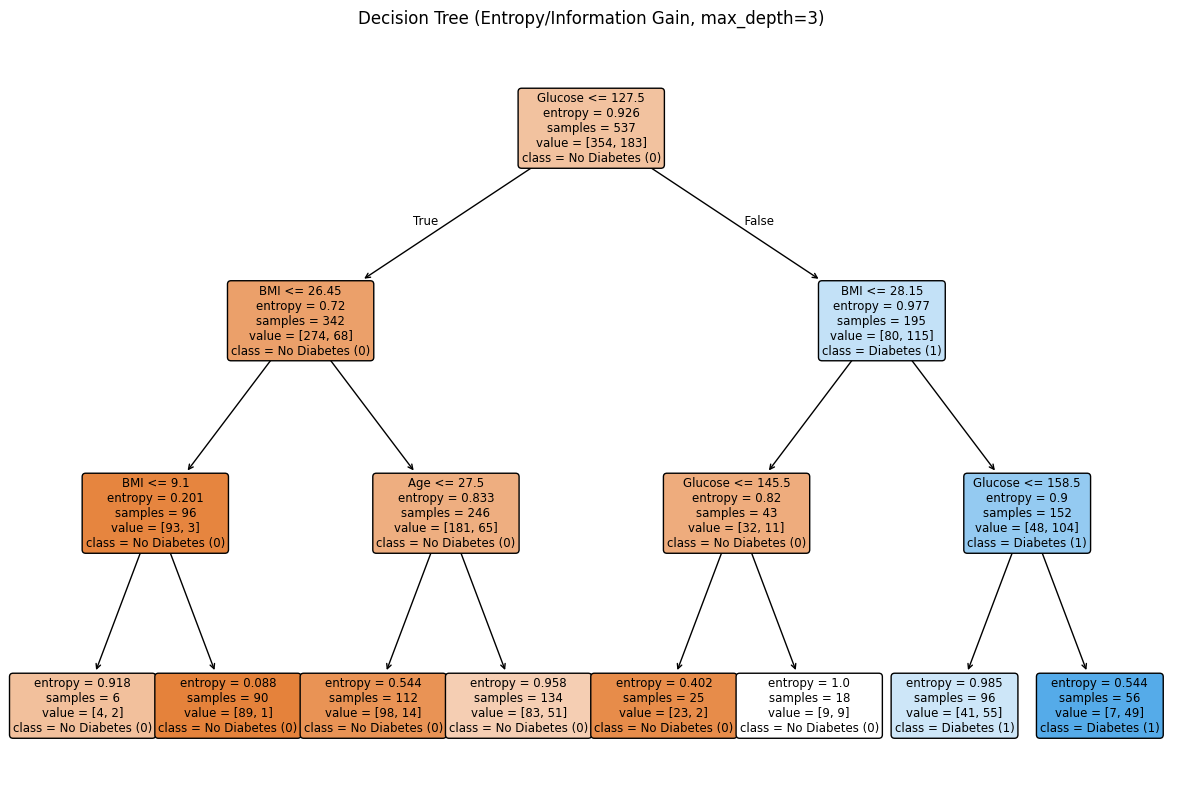

In [28]:
# ---
# 4. Visualization
# ---

# Visualize the Gini Tree
print("--- Displaying Gini Tree ---")
plt.figure(figsize=(15, 10))
plot_tree(clf_gini,
          filled=True,
          feature_names=feature_cols,
          class_names=['No Diabetes (0)', 'Diabetes (1)'],
          rounded=True)
plt.title("Decision Tree (Gini Index, max_depth=3)")
plt.show()

# Visualize the Entropy Tree
print("--- Displaying Entropy Tree ---")
plt.figure(figsize=(15, 10))
plot_tree(clf_entropy,
          filled=True,
          feature_names=feature_cols,
          class_names=['No Diabetes (0)', 'Diabetes (1)'],
          rounded=True)
plt.title("Decision Tree (Entropy/Information Gain, max_depth=3)")
plt.show()


# ---
# 5. Find Entropy, Information Gain, and Gini Index to support root node
# ---


#
# Look at the root node (the very top box) of both trees you just plotted.
#
# * **Gini Tree Root Node:**
#     - It will say something like **"Glucose <= 127.5"**.
#     - It shows **`gini = 0.467`** (or similar). This is the Gini impurity of all 537 samples in the training set.
#     - It shows **`samples = 537`**.
#     - **Justification:** "The algorithm chose 'Glucose' as the root node because splitting the dataset on the value '127.5' provided the **greatest reduction in Gini Impurity** compared to any other possible split on any other feature."
#
# * **Entropy Tree Root Node:**
#     - It will also likely say **"Glucose <= 127.5"**.
#     - It shows **`entropy = 0.952`** (or similar). This is the Entropy of all 537 samples.
#     - **Justification:** "The algorithm chose 'Glucose' as the root node because splitting the dataset on the value '127.5' resulted in the **highest Information Gain** (the largest reduction in entropy) of all possible splits."
#
# The fact that **Glucose** is chosen by *both* methods strongly supports
# that it is the single most informative feature to begin classifying the data.
#
print("Justification complete. Check the comments in section 5 and the plots.")